In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#df["Province/State"].value_counts()
#df["Province/State"].nunique()

In [3]:
#df_temp = df[df["age"].notnull()]
#df['age'] = df['age'].fillna("0")  # replace na with 0


In [4]:
df_Covid = pd.read_csv("COVID19_open_line_list.csv")  ## import dataset
df_Covid.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df_Covid.dropna(subset=["age"])    # drop na based on age column

In [6]:
def clean(age):       #replace all age group by 0
    if len(age)>2:   
        return "0"
    else:
        return age

age = df['age'].apply(clean)







In [7]:
df['age'] = age     # convert age column to int  type
df['age'] = df["age"].astype(int)

In [8]:
temp = df[df['age']!=0] # find mean age of people
mean_age = int(temp['age'].mean())

In [9]:
df['age'] = df['age'].apply(lambda x : mean_age if x==0 else x)   # replace  age by mean

Text(0.5, 0, 'Age groups')

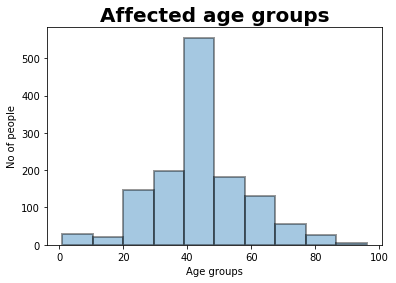

In [10]:
sns.distplot(df["age"],bins=10, kde=False,hist_kws=dict(edgecolor="k", linewidth=2))
plt.title("Affected age groups",fontsize=20,fontweight="bold")
plt.ylabel("No of people")
plt.xlabel("Age groups")

In [11]:
df_Covid.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_map = df_Covid.dropna(subset = ["country"])

In [13]:
df_map.shape

(13148, 45)

In [14]:
m  =df_map.groupby("country").count()["ID"].reset_index()
m.rename(columns={"ID":"count"},inplace=True)
#df_map.rename(columns={"ID":"Count"})

# This map shows countries affected by COVID19

In [15]:
import folium as fo
from  geopy import Nominatim
#df = df[df[["latitude",'longitude']].notna()]
#df.dropna(subset=['latitude','longitude'],inplace=True)
#china = df[df["country"]=="China"]
ma = fo.Map(location=[35.000074,104.999927],zoom_start=13)
geolocator = Nominatim(user_agent="Ken")
f = open("geo.txt")
for count,country,loc in zip(m["count"],m["country"],f.readlines()):
      lat, long  = loc.split(",")
      lat = float(lat[1:])
      long = float(long[:-2])
      pop = "<strong>"+country+"</strong>"+"<br>Affected people : "+ str(count)
      fo.Marker(
            [lat,long],
            popup = pop,
               ).add_to(ma)
f.close()
#ma.save("Map.html")
ma


# KNN [This model whether person will die or not]

In [16]:
import pandas as pd
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
recover = pd.read_csv("COVID19_line_list_data.csv")
recover = recover[['location','country','gender','age','visiting Wuhan','from Wuhan','death']]
recover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 7 columns):
location          1085 non-null object
country           1085 non-null object
gender            902 non-null object
age               843 non-null float64
visiting Wuhan    1085 non-null int64
from Wuhan        1081 non-null float64
death             1085 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 59.5+ KB


In [17]:
recover.dropna(inplace=True)
recover["death"] = recover['death'].apply(lambda x: "1" if len(x)>1 else x)
recover['death'] = recover["death"].astype(int)
recover.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 821 entries, 0 to 1084
Data columns (total 7 columns):
location          821 non-null object
country           821 non-null object
gender            821 non-null object
age               821 non-null float64
visiting Wuhan    821 non-null int64
from Wuhan        821 non-null float64
death             821 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 51.3+ KB


In [18]:
recover =pd.get_dummies(recover)


In [19]:
y =  recover['death']
recover.drop('death',inplace=True,axis=1)
X  = recover

In [20]:
X.head()

,age,visiting Wuhan,from Wuhan,location_Aichi Prefecture,location_Amiens,location_Andalusia,location_Annecy,location_Baden-Wuerttemberg,location_Barcelona,location_Bavaria,...,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_UAE,country_UK,country_USA,country_Vietnam,gender_female,gender_male
0,66.0,1,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,56.0,0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,46.0,0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,60.0,1,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,58.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
scale = MinMaxScaler()
#X = pd.DataFrame(scale.fit_transform(X.values),columns=X.columns)
#X.head()

In [22]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.35, random_state=42)

In [25]:
X_train = pd.DataFrame(scale.fit_transform(X_train),columns=X_train.columns)
X_train

,age,visiting Wuhan,from Wuhan,location_Aichi Prefecture,location_Amiens,location_Andalusia,location_Annecy,location_Baden-Wuerttemberg,location_Barcelona,location_Bavaria,...,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_UAE,country_UK,country_USA,country_Vietnam,gender_female,gender_male
0,0.378947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.568421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.463158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,0.442105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
529,0.810526,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
530,0.568421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
531,0.463158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
knn = KNeighborsClassifier(n_neighbors=3)

In [28]:

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [29]:
X_test = pd.DataFrame(scale.transform(X_test),columns=X_test.columns)

In [30]:

yhat = knn.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0])

In [31]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': yhat})
df.to_csv("Accuracy.csv")

In [32]:
knn.predict([X_test.loc[30]])

array([0])

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [34]:
confusion_matrix(y_test,yhat)

array([[257,   3],
       [ 14,  14]])

In [35]:
accuracy_score(y_test,yhat)

0.9409722222222222

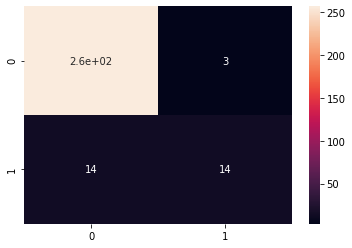

In [36]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,yhat),annot=True)

# Male vs female

In [37]:
m  = pd.read_csv('COVID19_line_list_data.csv')
m.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
m = m.dropna(subset=["gender"])
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 0 to 1084
Data columns (total 27 columns):
id                       902 non-null int64
case_in_country          705 non-null float64
reporting date           902 non-null object
Unnamed: 3               0 non-null float64
summary                  898 non-null object
location                 902 non-null object
country                  902 non-null object
gender                   902 non-null object
age                      825 non-null float64
symptom_onset            558 non-null object
If_onset_approximated    555 non-null float64
hosp_visit_date          505 non-null object
exposure_start           119 non-null object
exposure_end             320 non-null object
visiting Wuhan           902 non-null int64
from Wuhan               898 non-null float64
death                    902 non-null object
recovered                902 non-null object
symptom                  269 non-null object
source                   902 non-null 

In [39]:
#m['sex'] = m["sex"].apply(lambda x: x.lower())

Text(0, 0.5, 'No of people')

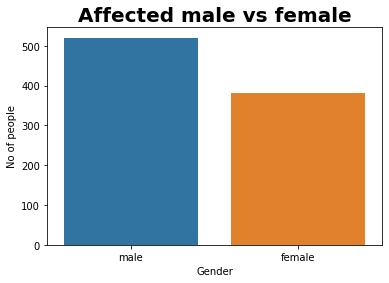

In [40]:
sns.countplot("gender",data=m)
plt.title("Affected male vs female",fontsize=20,fontweight="bold")
plt.xlabel("Gender")
plt.ylabel("No of people")

Text(0, 0.5, 'Age')

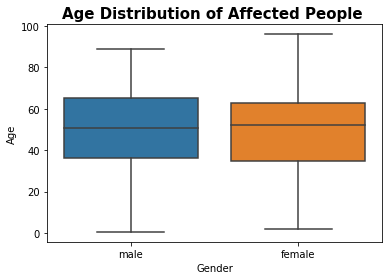

In [41]:
sns.boxplot('gender','age',data=m)
plt.title("Age Distribution of Affected People ",fontsize=15,fontweight="bold")
plt.xlabel("Gender")
plt.ylabel("Age")

In [42]:
import pandas as pd
import seaborn as sns
reg = pd.read_csv("covid_19_data.csv")


# Regression  ( Prediction of total no of spread of COVID19)

In [43]:
reg.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [44]:
reg = reg.groupby(["ObservationDate"]).sum()['Confirmed'].reset_index()
reg

,ObservationDate,Confirmed
0,01/22/2020,555
1,01/23/2020,653
2,01/24/2020,941
3,01/25/2020,1438
4,01/26/2020,2118
5,01/27/2020,2927
6,01/28/2020,5578
7,01/29/2020,6165
8,01/30/2020,8235
9,01/31/2020,9925


In [45]:
reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
ObservationDate    50 non-null object
Confirmed          50 non-null int64
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


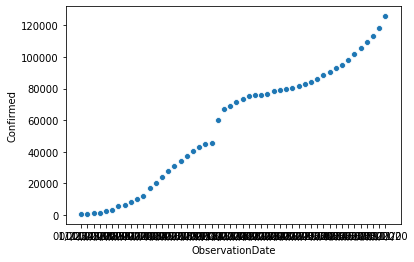

In [46]:
sns.scatterplot(x="ObservationDate",y="Confirmed",data=reg)

In [47]:
from datetime import datetime
def date_format(x):
    if len(x)<=8:
        x+="20"
    date_format = "%m/%d/%Y"
    a = datetime.strptime('01/22/2020', date_format)
    b = datetime.strptime(x, date_format)
    delta = b - a
    return delta.days+1 

In [48]:
reg["No_of_days"] = reg["ObservationDate"].apply(date_format)

In [49]:
reg.head(100)

,ObservationDate,Confirmed,No_of_days
0,01/22/2020,555,1
1,01/23/2020,653,2
2,01/24/2020,941,3
3,01/25/2020,1438,4
4,01/26/2020,2118,5
5,01/27/2020,2927,6
6,01/28/2020,5578,7
7,01/29/2020,6165,8
8,01/30/2020,8235,9
9,01/31/2020,9925,10


In [50]:
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split

In [51]:
lm = LinearRegression()

In [52]:
X = reg[["No_of_days"]]
y = reg["Confirmed"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [54]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
print(lm.intercept_)
print(lm.coef_)

-7454.383570630685
[2538.59983333]


In [56]:
yhat = lm.predict(X_test)
yhat

array([ 28086.01409599,  94089.60976258,  71242.21126261, 109321.20876257,
        38240.41342932, 116937.00826256,  61087.81192929,  58549.21209596,
        76319.41092927,  43317.61309598,  25547.41426266,   5238.61559602,
        89012.41009592,  15393.01492934,   2700.01576269,  10315.81526268,
        99166.80942925])

In [57]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': yhat})
df

,Actual,Predicted
13,23892,28086.014096
39,88371,94089.609763
30,76843,71242.211263
45,105836,109321.208763
17,37121,38240.413429
48,118582,116937.008263
26,73260,61087.811929
25,71226,58549.212096
32,78985,76319.410929
19,42763,43317.613096


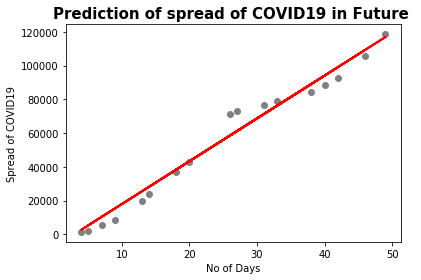

In [58]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, yhat, color='red', linewidth=2)
plt.title("Prediction of spread of COVID19 in Future ",fontsize=15,fontweight="bold")
plt.xlabel("No of Days")
plt.ylabel("Spread of COVID19")
plt.show()


In [59]:
date = input("Type date in m/d/Y fromat ")
print(date)
no_of_days = date_format(date)
affected = lm.predict([[no_of_days+1]])
print(int(affected[0]))

3/25/2020
157554
